# Libraries

In [1]:
# Data manipulation & analysis
import numpy as np
import pandas as pd
from io import StringIO

In [2]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
from IPython.display import Image

In [3]:
# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn import svm

In [4]:
# Model selection & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [5]:
# Other utilities
import os
from skimage.transform import resize
from skimage.io import imread
import pickle
import pydotplus
from sklearn.tree import export_graphviz
import re

# Data Loading, Preparation, & Exploration

In [6]:
# Load data
df = pd.read_csv("bcdf.csv")

print("Size of dataset:", df.shape)

Size of dataset: (569, 6)


In [7]:
# First few columns
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
# Last few columns
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [9]:
# To access the number of rows alone
print("We have", df.shape[0], "records")

# To access the number of columns alone
print("We have", df.shape[1], "features")

We have 569 records
We have 6 features


In [10]:
# Count the number of unique values in each column
df.nunique()

,0
mean_radius,456
mean_texture,479
mean_perimeter,522
mean_area,539
mean_smoothness,474
diagnosis,2


In [11]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [13]:
# Divide the dataset into numeric and categorical values
numeric_values = df.select_dtypes(include = ['int64', 'float64'])
categorical_values = df.select_dtypes(include = ['object'])

# Debugging
print("Number of numeric columns: ", numeric_values.shape[1])
print("Number of categorical columns: ", categorical_values.shape[1])

Number of numeric columns:  6
Number of categorical columns:  0


In [15]:
# Statistical overview of numerical data
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


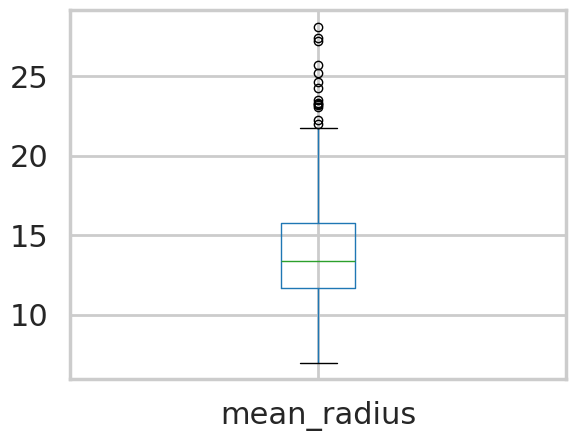

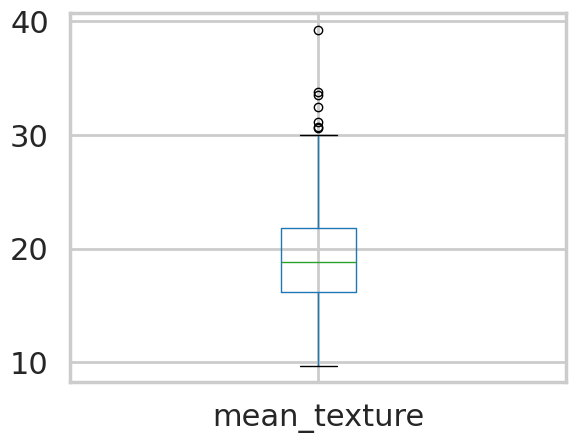

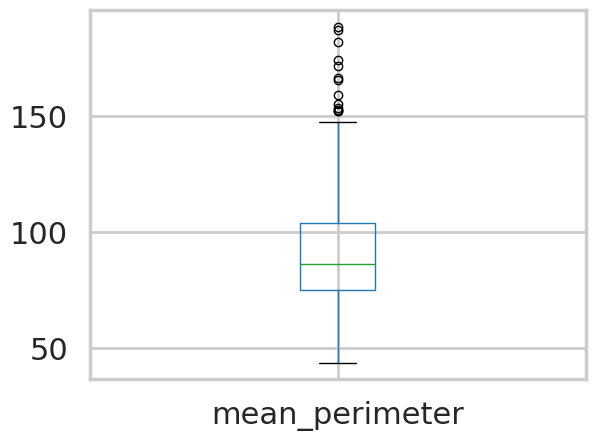

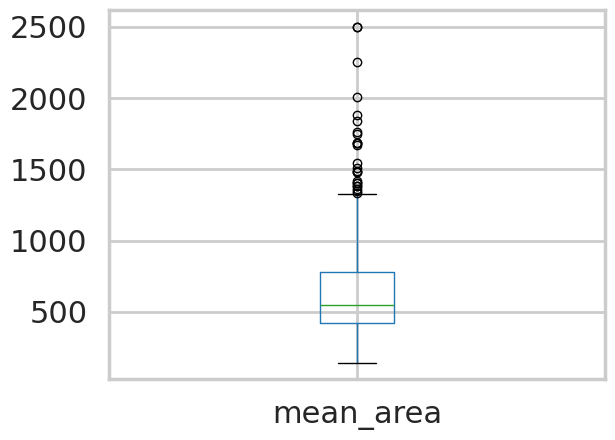

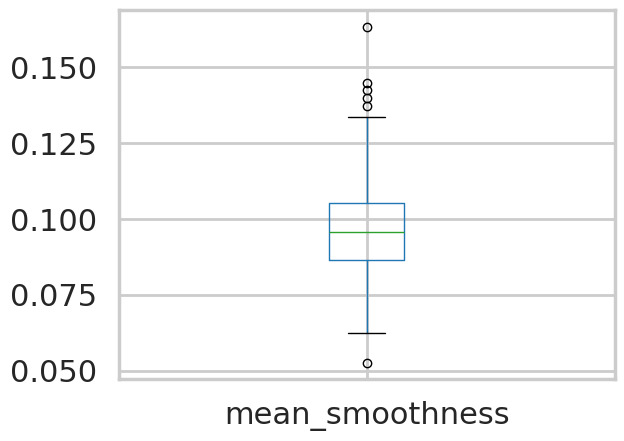

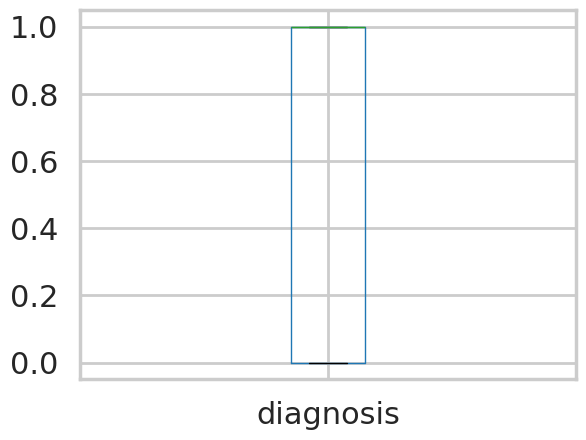

In [17]:
# Visualize the distribution of numeric data using box plots
for column in numeric_values:
    plt.figure()
    df.boxplot([column])

In [18]:
# Determine the distribution of values in mean_radius
df["mean_radius"].value_counts()

,count
mean_radius,
12.34,4
11.71,3
12.46,3
13.05,3
10.26,3
...,...
12.23,1
14.45,1
19.18,1


In [20]:
# Correlation between mean_radius and all other features
df.corr()["mean_radius"].sort_values(ascending = False)

,mean_radius
mean_radius,1.000000
mean_perimeter,0.997855
mean_area,0.987357
mean_texture,0.323782
mean_smoothness,0.170581
diagnosis,-0.730029


In [21]:
# List columns with only 1 distinct value
print([col for col in df.columns if df[col].value_counts().shape[0] == 1])

[]


# Data Division, Scaling & Binning

In [22]:
# Separate the predictor columns and the target variable
X = df.drop(columns=['diagnosis'])
Y = df["diagnosis"]

# Debugging
print("Number of predictor columns: ", X.shape[1])
print("Number of target columns: ", Y.shape[0])

Number of predictor columns:  5
Number of target columns:  569


In [23]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12)

# Debugging
print("Number of training records: ", X_train.shape[0])
print("Number of test records: ", X_test.shape[0])

Number of training records:  426
Number of test records:  143


In [25]:
# Data scaling
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

# Debugging
print("Number of training records: ", X_train_sdf.shape[0])
print("Number of test records: ", X_test_sdf.shape[0])

Number of training records:  426
Number of test records:  143


In [26]:
# Discrete class labels based on binning
num_classes = 3
percentiles = np.linspace(0, 100, num_classes + 1)
bin_edges = np.percentile(Y_train, percentiles)
Y_train_discrete = np.digitize(Y_train, bin_edges[1:], right = True)

# Debugging
print("Number of training records: ", Y_train_discrete.shape[0])

Number of training records:  426


# Helping Functions

In [38]:
# Function that calculates the accuracy score
# Using sklearn's accuracy_score method
def get_accuracy_score(Y_test, Y_pred):
    return metrics.accuracy_score(Y_test, Y_pred) * 100

In [37]:
# Function that calculates the cross-validation score
def get_cross_val_score(model):

    # Create a pipeline to scale the data using MinMaxScaler and fit the model
    full_pipeline = make_pipeline(MinMaxScaler(), model)

    # Perform 10-fold cross-validation and calculate the cross-validation scores
    # Multiply each score by 100 to convert to a percentage
    scores = cross_val_score(full_pipeline, X, Y, cv = 10) * 100

    # Calculate and return the average of the cross-validation scores
    return scores.mean()

In [36]:
# Function to calculate and return the error score
# as 100 minus the accuracy score
def get_error_score(Y_test, Y_pred):
    return (100 - get_accuracy_score(Y_test, Y_pred))

In [29]:
# Function to evaluate the performance of a model
def evaluate_model(Y_test, Y_pred, model_name):

    # Calculate evaluation metrics
    accuracy = get_accuracy_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred, average='weighted') * 100
    report = metrics.classification_report(Y_test, Y_pred)
    cross_val = get_cross_val_score(model_name)
    error = get_error_score(Y_test, Y_pred)

    print(f"\n{'='*50}\nEVALUATION REPORT FOR MODEL: {model_name}\n{'='*50}")
    print(f"Classification Report:\n{report}")
    print(f"Accuracy Score: {accuracy:.2f}%")
    print(f"Recall Score: {recall:.2f}%")
    print(f"Cross-Validation Score: {cross_val:.2f}%")
    print(f"Error Score: {error:.2f}%")
    print(f"{'='*50}\n")

In [30]:
# Function to plot the confusion matrix
def confmatrix(Y_true, Y_pred, title):

    # Calculate the confusion matrix
    cm = confusion_matrix(Y_true, Y_pred)

    # Create a DataFrame for better visualization
    df_cm = pd.DataFrame(cm, index = [0, 1], columns = [0, 1])

    # Set the size
    plt.figure(figsize=(10, 7))

    # Plot the confusion matrix using Seaborn heatmap
    sns.heatmap(df_cm,
                annot = True,         # Annotate each cell with the numeric value
                fmt = "d",            # Integer format for cell values
                cmap = 'pink_r',      # Color map for the heatmap
                cbar = True,          # Show color bar
                linewidths = 1,       # Line width between cells
                linecolor = 'black')  # Line color between cells

    # Add plot labels and title and display
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [87]:
# Function to compare the accuracy scores of different models
def compare_final_accuracy(accuracy_scores):

    # Find the model with the highest accuracy
    best_model_name = max(accuracy_scores, key = accuracy_scores.get)
    best_model_accuracy = accuracy_scores[best_model_name]

    print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

    # Extract model names and their corresponding accuracy values for plotting
    model_names = list(accuracy_scores.keys())
    accuracy_values = list(accuracy_scores.values())

    # Plot the comparison of model accuracies
    plt.figure(figsize=(8, 6))

    # Create the bar plot
    bars = plt.barh(model_names, accuracy_values, color='pink')
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

    plt.xlabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xlim([0, 100])
    plt.grid(False)
    plt.show()

    # Return the name and accuracy of the best-performing model
    return best_model_name, best_model_accuracy

In [88]:
# Function to compare cross-validation scores of different models
def compare_final_validation(cVal_scores):

    # Identify the model with the highest cross-validation score
    best_model_name = max(cVal_scores, key = cVal_scores.get)
    best_model_cVal = cVal_scores[best_model_name]

    print(f"The best model is {best_model_name} with a cross-validation percent of {best_model_cVal:.4f}")

    # Extract model names and their corresponding cross-validation values for plotting
    model_names = list(cVal_scores.keys())
    cVal_values = list(cVal_scores.values())

    # Plot the comparison of model cross-validation scores
    plt.figure(figsize=(8, 6))

    # Create the bar plot
    bars = plt.barh(model_names, cVal_values, color='pink')
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

    plt.xlabel('Cross-Validation')
    plt.title('Model Cross-Validation Comparison')
    plt.xlim([0, 100])
    plt.grid(False)
    plt.show()

    # Return the name and cross-validation score of the best-performing model
    return best_model_name, best_model_cVal

In [89]:
# Function to compare error scores of different models
def compare_final_error(err_scores):

    # Identify the model with the lowest error score
    best_model_name = min(err_scores, key=err_scores.get)
    best_model_err = err_scores[best_model_name]

    print(f"The best model is {best_model_name} with an error value of {best_model_err:.4f}")

    # Extract model names and their corresponding error values for plotting
    model_names = list(err_scores.keys())
    err_values = list(err_scores.values())

    # Plot the comparison of model error values
    plt.figure(figsize=(8, 6))

    # Create the bar plot
    bars = plt.barh(model_names, err_values, color='pink')
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

    plt.xlabel('Error Value')
    plt.title('Model Error Value Comparison')
    plt.xlim([0, 100])
    plt.grid(False)
    plt.show()

    # Return the name and error score of the best-performing model
    return best_model_name, best_model_err

In [90]:
# Function to compare the accuracy, cross-validation, and error scores of models
def compare_all_scores(acc_scores, cVal_scores, err_scores):

    # Normalize error scores by inverting them (since lower error is better)
    normalized_err_scores = {model: 1 - score for model, score in err_scores.items()}

    # Calculate an overall score for each model using a weighted average (can adjust weights as needed)
    overall_scores = {
        model: (acc_scores.get(model, 0) + cVal_scores.get(model, 0) + normalized_err_scores.get(model, 0)) / 3
        for model in set(acc_scores) | set(cVal_scores) | set(err_scores)
    }

    # Find the best model based on the highest overall score
    best_model_name = max(overall_scores, key=overall_scores.get)
    best_model_score = overall_scores[best_model_name]

    print(f"The best model is {best_model_name} with an overall score of {best_model_score:.4f}")

    # Plotting the comparison of model overall scores
    model_names = list(overall_scores.keys())
    overall_values = list(overall_scores.values())
    plt.figure(figsize=(8, 6))

    # Create the bar plot
    bars = plt.barh(model_names, overall_values, color='pink')
    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.2f}%', va='center', ha='left', color='black', fontsize=10)

    plt.xlabel('Overall Score')
    plt.title('Model Overall Score Comparison')
    plt.xlim([0, 100])
    plt.grid(False)
    plt.show()

    # Return the best model and its score
    return best_model_name, best_model_score

# Decision Tress

In [39]:
# Initialize the model
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train_sdf, Y_train_discrete)

# Make predictions using the test set
dtree_pred = dtree.predict(X_test_sdf)

# Evaluate the model
evaluate_model(Y_test, dtree_pred, dtree)


EVALUATION REPORT FOR MODEL: DecisionTreeClassifier()
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        53
           1       0.89      0.94      0.91        90

    accuracy                           0.89       143
   macro avg       0.89      0.87      0.88       143
weighted avg       0.89      0.89      0.89       143

Accuracy Score: 88.81%
Recall Score: 88.81%
Cross-Validation Score: 87.35%
Error Score: 11.19%



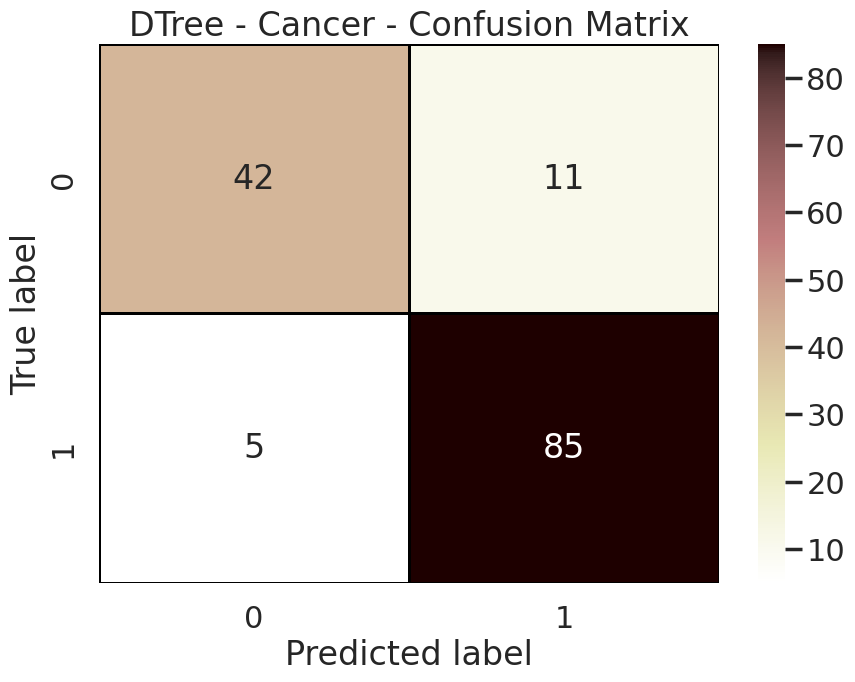

In [40]:
# Plot confusion matrix
confmatrix(Y_test, dtree_pred, "DTree - Cancer - Confusion Matrix")

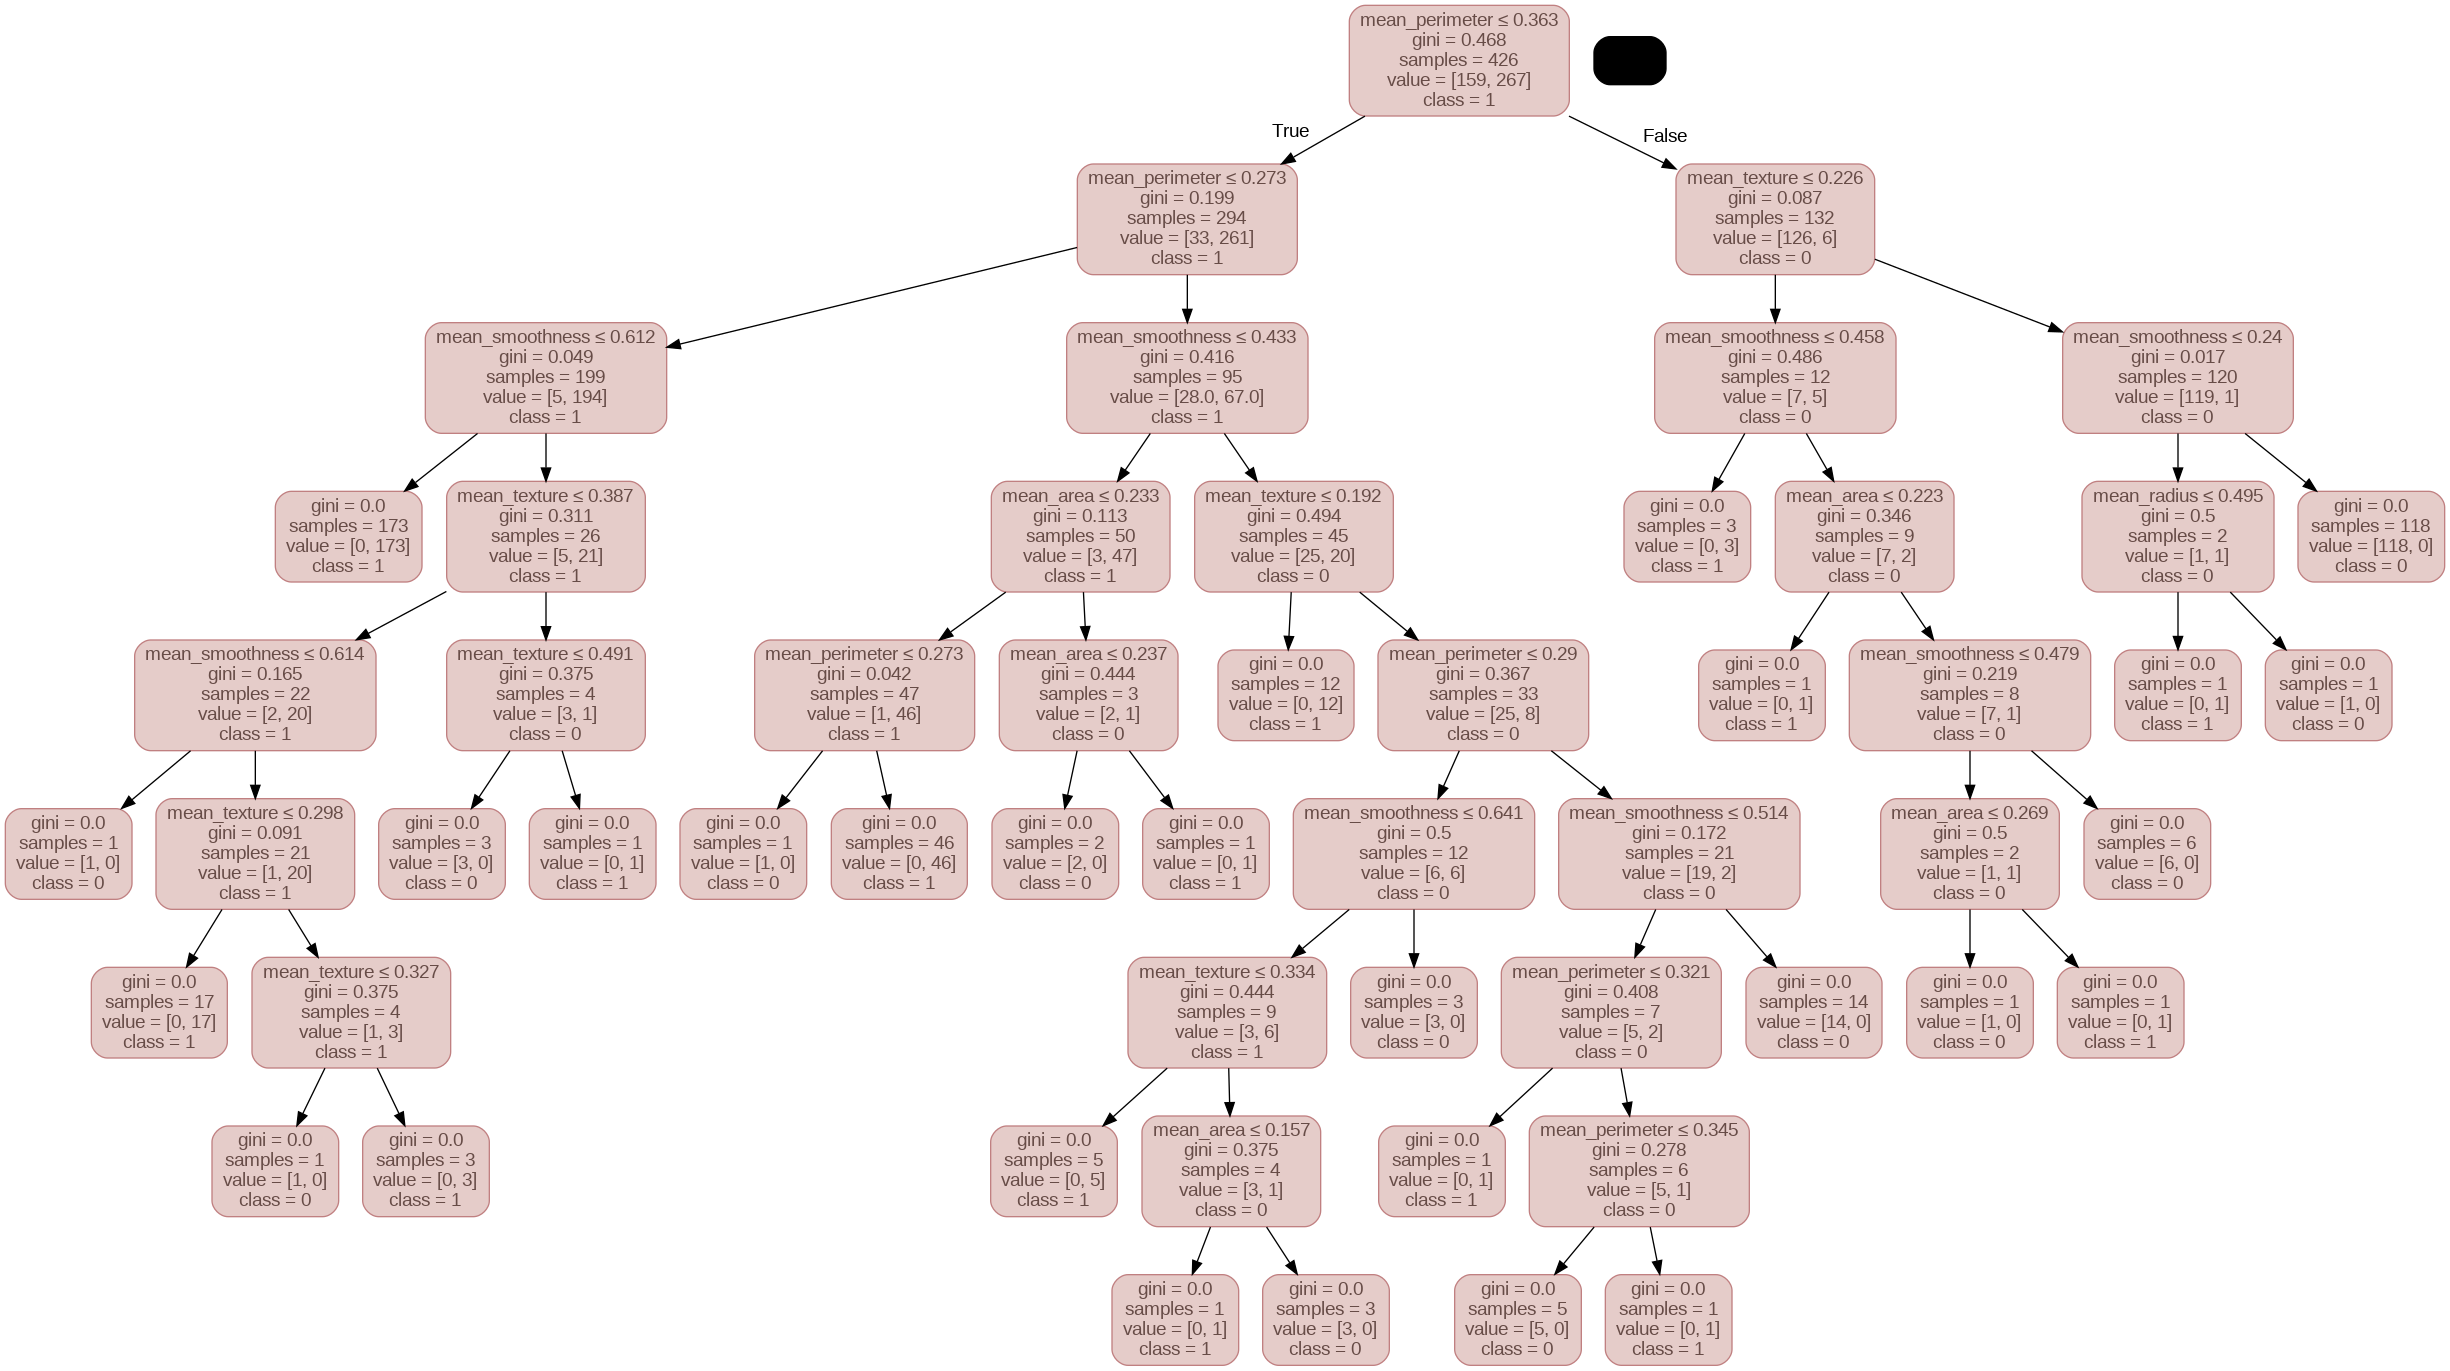

In [41]:
# List of feature column names from the training data
feature_col = X_train.columns.tolist()

# List of unique class labels from the target variable Y_train
class_col = pd.unique(Y_train).astype(str).tolist()

# Prepare to export the decision tree visualization into a DOT format
dot_data = StringIO()

# Export the decision tree into DOT format
# This generates the structure of the decision tree with detailed node information
export_graphviz(dtree,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = feature_col,
                class_names = class_col)

# Convert the DOT data into a string
dot_data_string = dot_data.getvalue()

# Generate a graph from the DOT format string
graph = pydotplus.graph_from_dot_data(dot_data_string)

# Loop through each node in the graph and apply customized styling
for node in graph.get_nodes():
    if node.get_fillcolor():
        node.set_fillcolor("#e5ccc9")
        node.set_fontcolor("#674c47")
        node.set_color("#c08081")

# Render the tree as a PNG image to display it
Image(graph.create_png())

# KNN

In [42]:
# Define the range of values for the hyperparameter 'n_neighbors' to search over
param_grid = {'n_neighbors': range(3, 200, 2)}

# Set up the GridSearchCV object, specifying:
# 1. The model: KNeighborsClassifier()
# 2. The parameter grid: param_grid (which defines the range of 'n_neighbors')
# 3. 10-fold cross-validation (cv=10) to assess model performance
# 4. The scoring metric to optimize: 'accuracy'
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')

# Fit the GridSearchCV to the training data
grid.fit(X_train_sdf, Y_train_discrete)

# Extract the best number of neighbors (K) that gave the best performance
k = grid.best_params_['n_neighbors']

# Get the best accuracy score achieved during the grid search (cross-validation)
score = grid.best_score_ * 100

print("Best parameters (best value of K):", k)
print("Best score:", score)

Best parameters (best value of K): 35
Best score: 94.36323366555925


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [43]:
# Initialize the model with the best number of neighbors found (k)
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train_sdf,Y_train_discrete)

# Make predictions using the test set
knn_pred = knn.predict(X_test_sdf)

# Evaluate the model
evaluate_model(Y_test, knn_pred, knn)


EVALUATION REPORT FOR MODEL: KNeighborsClassifier(n_neighbors=35)
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        53
           1       0.87      0.98      0.92        90

    accuracy                           0.90       143
   macro avg       0.91      0.87      0.88       143
weighted avg       0.90      0.90      0.89       143

Accuracy Score: 89.51%
Recall Score: 89.51%
Cross-Validation Score: 92.80%
Error Score: 10.49%



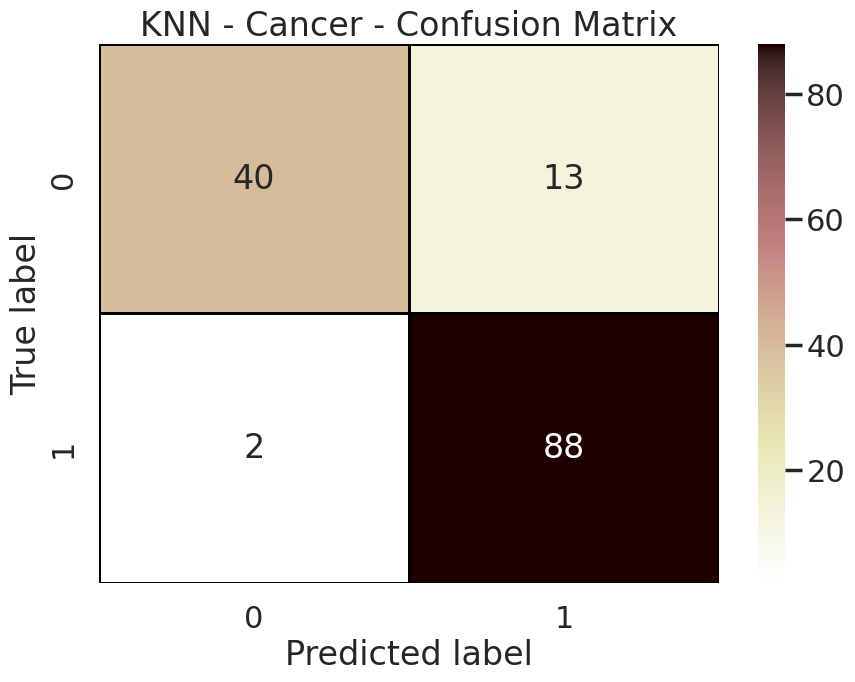

In [44]:
# Plot confusion matrix
confmatrix(Y_test, knn_pred,"KNN - Cancer - Confusion Matrix")

# SVM

In [45]:
# Initialize the model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, Y_train_discrete)

# Make predictions using the test set
svm_pred = svm.predict(X_test)

# Evaluate the model
evaluate_model(Y_test, svm_pred, svm)


EVALUATION REPORT FOR MODEL: SVC()
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        53
           1       0.83      0.97      0.89        90

    accuracy                           0.85       143
   macro avg       0.87      0.81      0.83       143
weighted avg       0.86      0.85      0.85       143

Accuracy Score: 85.31%
Recall Score: 85.31%
Cross-Validation Score: 92.09%
Error Score: 14.69%



In [46]:
# Initialize the model
clf = SVC()

# Define the hyperparameter grid for the model: trying different kernels and values for C
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}

# Set up GridSearchCV for hyperparameter tuning, using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv = 5, scoring = 'accuracy')

# Fit the GridSearchCV with the training data
grid_search.fit(X_train, Y_train_discrete.ravel())

print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1, 'kernel': 'linear'}


In [48]:
# Initialize the model with the best hyperparameters
clf_best = grid_search.best_estimator_

# Fit the model to the training data
clf_best.fit(X_train, Y_train_discrete.ravel())

# Make predictions using the test set
clf_pred = clf_best.predict(X_test)

# Evaluate the model
evaluate_model(Y_test, clf_pred, clf)


EVALUATION REPORT FOR MODEL: SVC()
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81        53
           1       0.86      0.96      0.91        90

    accuracy                           0.87       143
   macro avg       0.88      0.85      0.86       143
weighted avg       0.88      0.87      0.87       143

Accuracy Score: 87.41%
Recall Score: 87.41%
Cross-Validation Score: 92.09%
Error Score: 12.59%



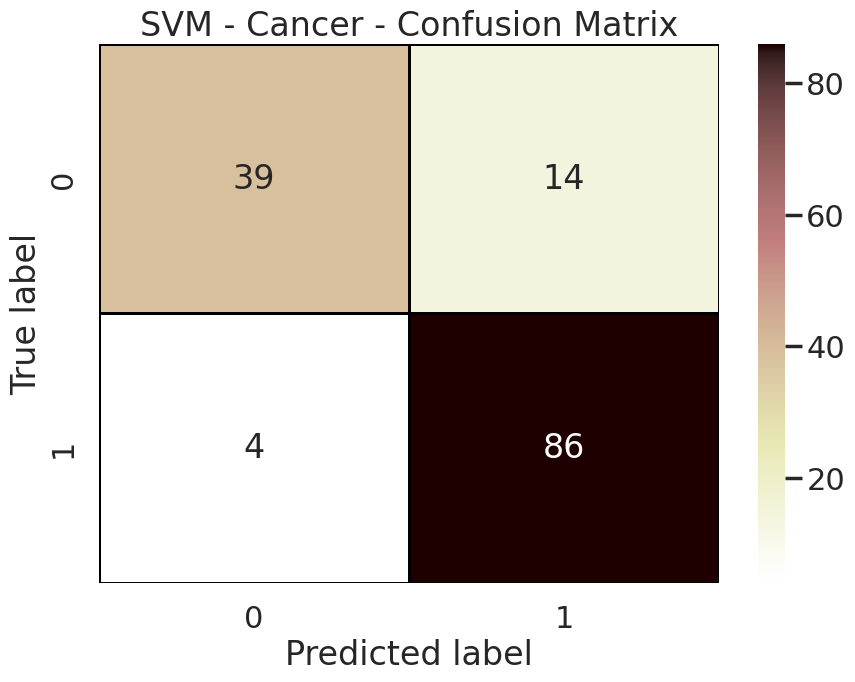

In [49]:
# Plot confusion matrix
confmatrix(Y_test, clf_pred,"SVM - Cancer - Confusion Matrix")

# Comparing Results

The best model is KNN with an accuracy of 89.5105


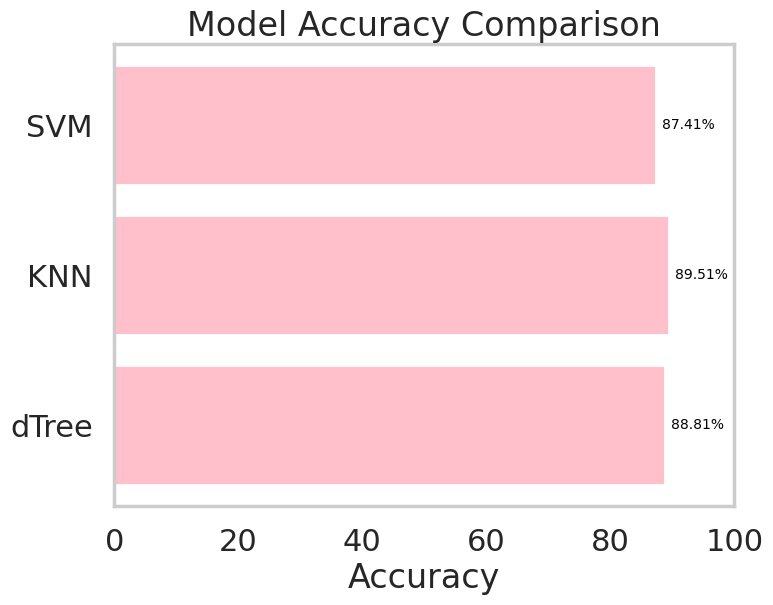

In [91]:
# Calculate accuracy scores for each model
accuracy_scores = {
    "dTree": get_accuracy_score(Y_test, dtree_pred),
    "KNN": get_accuracy_score(Y_test, knn_pred),
    "SVM": get_accuracy_score(Y_test, clf_pred)
}

# Compare the models' accuracy scores and find the best model
best_model_name, best_model_accuracy = compare_final_accuracy(accuracy_scores)

The best model is KNN with a cross-validation percent of 92.7976


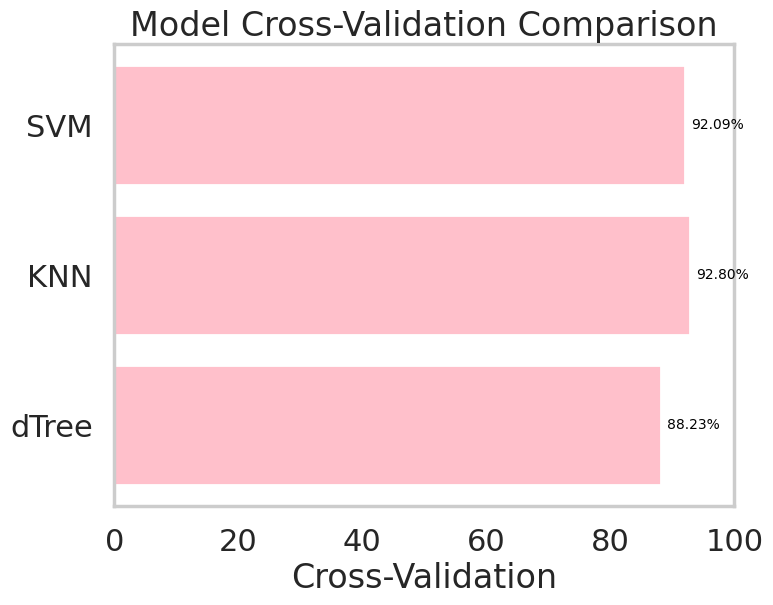

In [92]:
# Calculate cross-validation scores for each model
cVal_scores = {
    "dTree": get_cross_val_score(model = dtree),
    "KNN": get_cross_val_score(model = knn),
    "SVM": get_cross_val_score(model = clf),
}

# Compare the models' cross-validation scores and find the best model
best_model_name, best_model_cVal = compare_final_validation(cVal_scores)

The best model is KNN with an error value of 10.4895


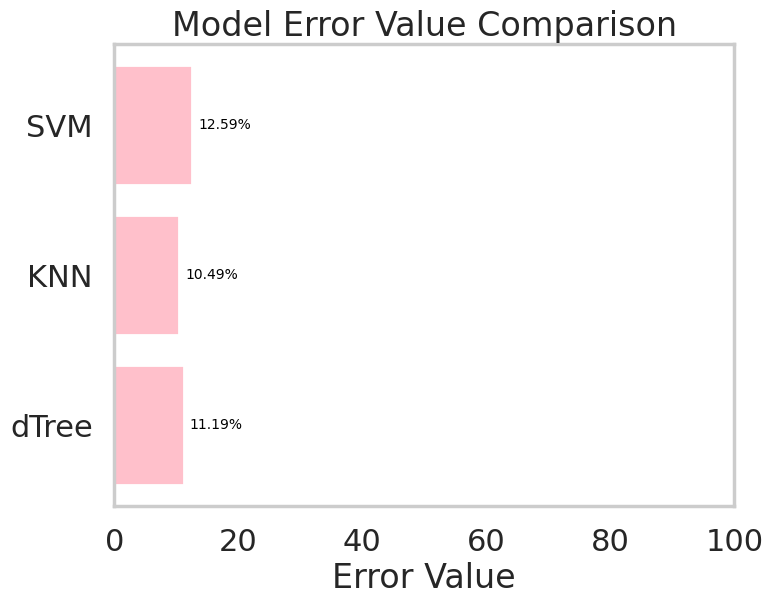

In [93]:
# Calculate error scores for each model
error_scores = {
    "dTree": get_error_score(Y_test, dtree_pred),
    "KNN": get_error_score(Y_test, knn_pred),
    "SVM": get_error_score(Y_test, clf_pred),
}

# Compare the models' error scores and find the best model
best_model_name, best_model_cVal = compare_final_error(error_scores)

The best model is KNN with an overall score of 57.6062


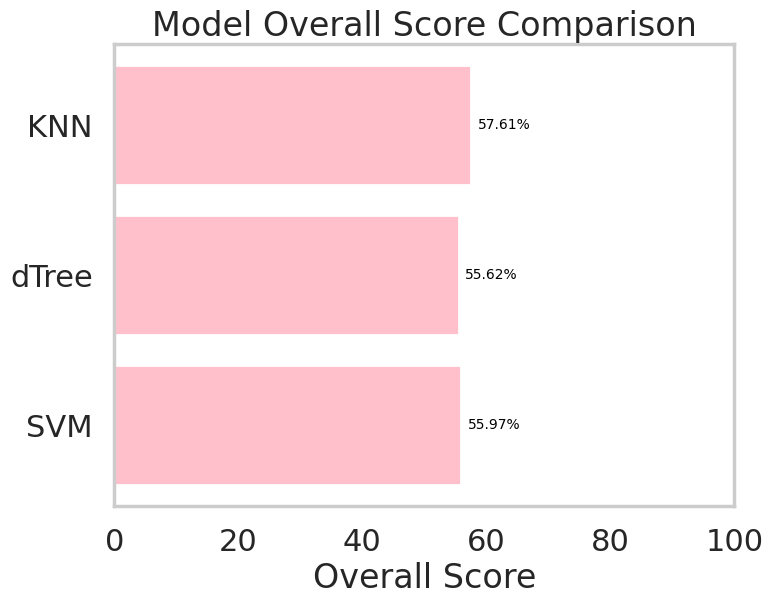

('KNN', 57.60619935619934)

In [94]:
# Compare the models' scores and find the best model
compare_all_scores(accuracy_scores, cVal_scores, error_scores)